<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT421/blob/main/herrera_module_G.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **MODULE G:** Numerical Differentiation
# **AUTHOR:** Benjamin Joseph L. Herrera
# **CLASS:** MAT 421
# **DATE:** 1 MAR 2024

## ⚠️ Run these commandes prior to running anything

In [1]:
!pip install scipy
!pip install matplotlib

## What's the Issue with Nummerical Differentiation?

Grids can take many forms. They can be single dimensional (straight line), in a 2D graph (X and Y axis), or even in a 3D plot (X, Y, and Z axis). But one thing is for certain, it's that there is a deliniation of the intervals. This means that each tick on these graphss follow a set/constant interval $c$ of some value. This interval can be discrete or continous based on the application/use-case. 

## Approximation of Derivatives

As we all know, the derivative of a function $f(x)$ is defined as:

$$f'(x) = \frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}$$

When we evaluate the value of the derivative at some point $p$, we calculate it as:

$$f'(p) = \lim_{h \rightarrow p} \frac{f(x) - f(p)}{x-p}$$

To get the `finite difference` approximations at this point, we can use three different methods using the neighboring points around `p`. The first method is to use **forward differencing**. This method focuses on simply calculating the slope at using the "old-fashion way."

$$f'(p) = \frac{f(p_{i+1})-f(p)}{p_{i+1} - p}$$

where $p_{i+1}$ is a forward neighbor of $p$.

Another method is **backward differencing**. This is done by using the backward neighboring value rather than the forward neighbor in forward differencing.

$$f'(p) = \frac{f(p)-f(p_{i-1})}{p - p_{i-1}}$$

where $p_{i-1}$ is the backward neighbor.

The last method is **central differencing** where we use the forward and the backward neighbors of $p$.

$$f'(p) = \frac{f(p_{i+1})-f(p_{i-1})}{p_{i+1} - p_{i-1}}$$

## Usng Taylor Series with Considerations

We can combine the definition of a limit and some concepts of Taylor Series to get the derivative of a function:

$$f'(x_i) = \frac{f(x_{x+1})-f(x)}{h} + \left(-\frac{f''(x_i)(x_{i+1}-x_i)}{2!}-\frac{f'''(x_i)(x_{i+1}-x_i)^2}{3!} \dots -\frac{f^n(x_i)(x_{i+1}-x_i)^{n-1}}{n!}\right)$$

Adding terms inside the larger parentheses is called `increasing order terms` and is denoted by the value of $n$. This can be subsituted to:

$$n(\alpha + \epsilon(n))$$

This can also be subsituted into:

$$O(n)$$

Essentially, this increasing order terms signifies the accuracy of the evaluation of the derivative. The higher it is, the more accurate it is. The lower, the less accurate. Looping back to the three differencing methods, as we increase the order of this parameter, we get a formula that can easily approximate the derivative of the function at point $p$.

However, accuracy and stability are two main issues when implementing methods like these. Different step or interval values can cause greater errors than other step values. Additionally, integrating more and more of these terms can cause stability issues where accuracy is compromised. We show this issue in the next section where a lower step size helps with accuracy.

One other thing to note is that we can use this method for higher order derivatives. Following through on the definition of a first-order derivative with taylor series, we can get the following second-order taylor series after deriving the derivative of the first-order:

$$f''(x_i) \approx \frac{f(x_{i+1} - 2f(x_i) + f(x_{i-1}))}{n^2}$$

This is in the order of $O(n^2)$

## Python Usage

A cool thing is that we can use Python to do these types of differentiation and plot their values against other differntiation methods. Here, we use differential approximation for the $sin(x)$ function.

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

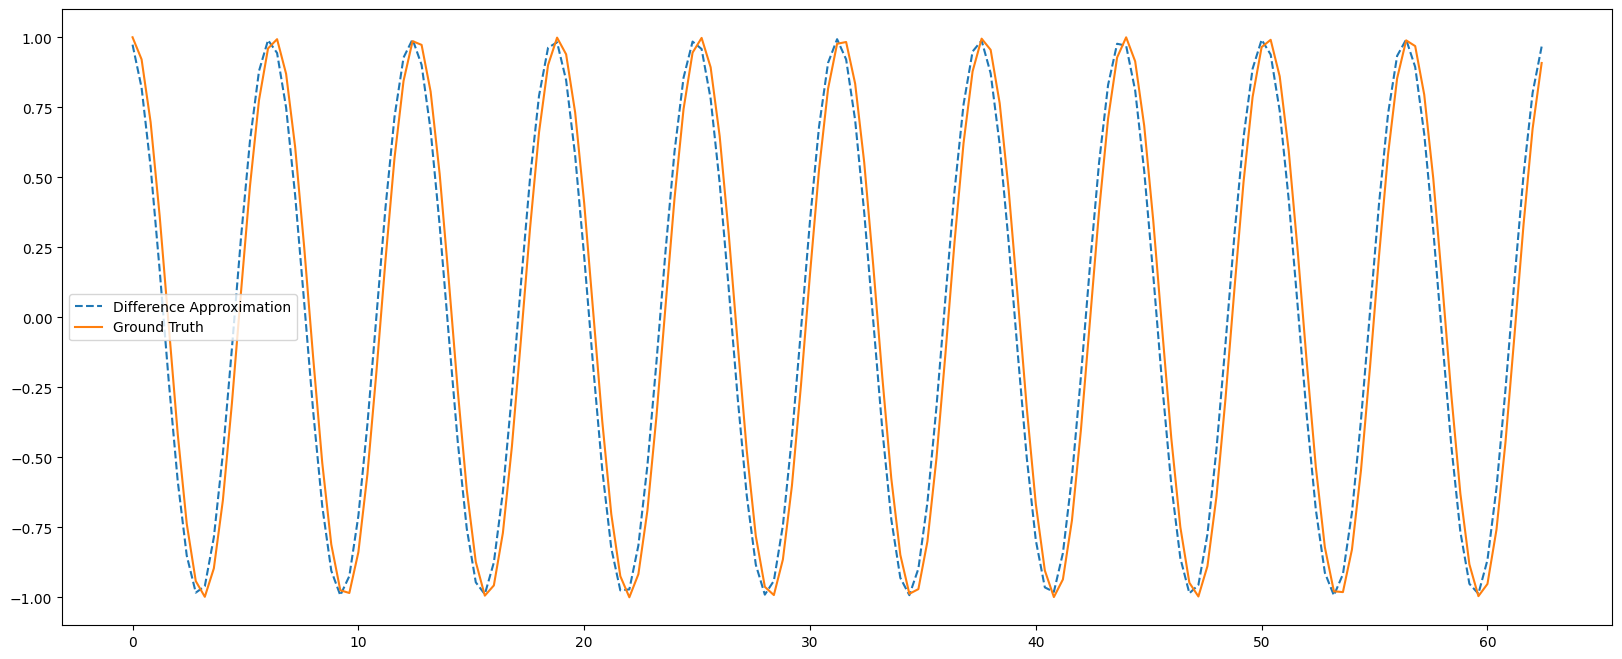

0.19911116607181592


In [3]:
# Calculate differential approximation
h = 0.4
x = np.arange(0, 20 * np.pi, h)
y = np.sin(x)
forward_diff = np.diff(y) / h
x_diff = x[:-1:]
exact_solution = np.cos(x_diff)

# Plot solution
plt.figure(figsize=(20, 8))
plt.plot(x_diff, forward_diff, "--", label="Difference Approximation")
plt.plot(x_diff, exact_solution, label="Ground Truth")
plt.legend()
plt.show()

# Get the max error
print(max(abs(exact_solution - forward_diff)))

You'll notice that there is some discrepancies, but this approximation is nearly on par with the ground truth for $sin(x)$'s differentiation.

We can make this more accurate by decreasing the interval or the next nearest forward neighbor.

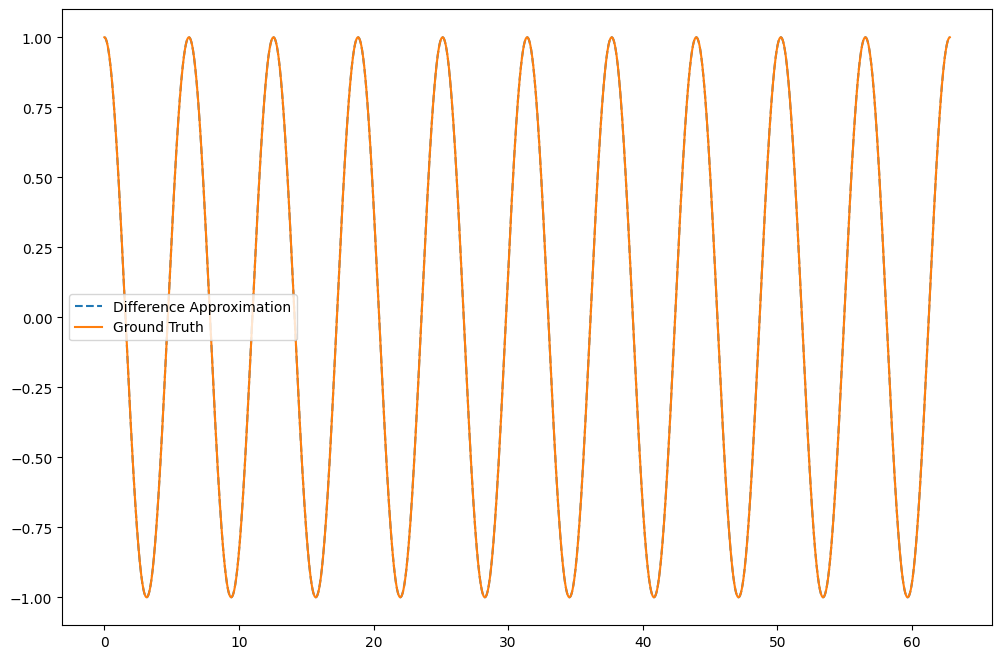

0.0024999982599521473


In [4]:
# Calculate differential approximation
h = 0.005
x = np.arange(0, 20 * np.pi, h)
y = np.sin(x)
forward_diff = np.diff(y) / h
x_diff = x[:-1:]
exact_solution = np.cos(x_diff)

# Plot solution
plt.figure(figsize=(12, 8))
plt.plot(x_diff, forward_diff, "--", label="Difference Approximation")
plt.plot(x_diff, exact_solution, label="Ground Truth")
plt.legend()
plt.show()

# Get the max error
print(max(abs(exact_solution - forward_diff)))

Here, the max error here is much lower than the one before. Additionally, the approximation is on top of the ground truth.